In [643]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
from sklearn.svm import SVC, LinearSVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
from ggplot import *
%pylab inline


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [879]:
data = pd.read_table("down_data2.txt", delim_whitespace=True)
data1 = pd.read_table("down_data1.txt", delim_whitespace=True)
data2 = pd.read_table("down_data2.txt", delim_whitespace=True)
data3 = pd.read_table("down_data3.txt", delim_whitespace=True)
data4 = pd.read_table("down_data4.txt", delim_whitespace=True)
data5 = pd.read_table("down_data5.txt", delim_whitespace=True)

In [880]:
data.info()
data.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 1 to 86
Columns: 282 entries, SampleNumber to Class
dtypes: float64(280), int64(1), object(1)
memory usage: 190.1+ KB


,SampleNumber,X1.mean.Tube1,X1.sd.Tube1,X1.median.Tube1,X1.skew.Tube1,X1.kurtosis.Tube1,X2.mean.Tube1,X2.sd.Tube1,X2.median.Tube1,X2.skew.Tube1,...,X6.sd.Tube8,X6.median.Tube8,X6.skew.Tube8,X6.kurtosis.Tube8,X7.mean.Tube8,X7.sd.Tube8,X7.median.Tube8,X7.skew.Tube8,X7.kurtosis.Tube8,Class
82,215,0.627111,0.252657,0.680352,-0.448712,-0.930378,0.011981,0.011700,0.011980,38.619819,...,0.016039,0.000249,29.209400,1206.859726,0.000243,0.001936,0.000075,72.750337,7205.194502,normal
83,319,0.733573,0.218293,0.776149,-1.030491,0.425159,0.019864,0.012844,0.019358,12.533894,...,0.009816,0.000538,46.264189,3005.352232,0.000330,0.001869,0.000100,37.646756,1988.010987,normal
84,248,0.735322,0.211322,0.774194,-1.062901,0.640311,0.017607,0.010530,0.017525,5.434869,...,0.007091,0.000102,38.788247,1930.712080,0.000209,0.001286,0.000086,31.474986,1320.691221,normal
85,359,0.534086,0.203849,0.537634,0.184977,-0.467032,0.020563,0.020606,0.018007,16.944201,...,0.016690,0.000137,37.305640,1691.244772,0.000418,0.010053,0.000084,73.727042,5914.720048,normal
86,163,0.388663,0.185972,0.336266,1.645651,2.509269,0.007574,0.033170,0.002336,19.990859,...,0.007233,0.000075,92.784703,8780.388216,0.000030,0.000333,0.000000,36.693156,1806.678303,normal


In [881]:
data = data.drop("SampleNumber", axis=1)
X = data.drop("Class", axis=1)
Y = data["Class"]
Y = pd.get_dummies(Y).aml

In [878]:
#data = data.drop("SampleNumber", axis=1)
#X = data.drop("Label", axis=1)
#Y = data["Label"]
#Y = pd.get_dummies(Y).aml

In [846]:
# Split the dataset in two equal parts
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.6, random_state=0)

In [847]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred_log = logreg.predict(X_test)
logreg_accur=accuracy_score(Y_test, Y_pred_log)
logreg.score(X_train, Y_train)
logreg_accur

0.61538461538461542

In [848]:
##Support Vector Machines
## Scaling data for SVM
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

svc = SVC(probability=True)
svc.fit(X_train_scaled, Y_train)
Y_pred_svc = svc.predict(X_test_scaled)
svc.score(X_train_scaled, Y_train)
svc_accur = accuracy_score(Y_test, Y_pred_svc)
svc_accur



0.90384615384615385

In [849]:
# Random Forests
random_forest = RandomForestClassifier(n_estimators=15, random_state=0)
#random_forest = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=10, max_features='sqrt', min_samples_split=5)
random_forest.fit(X_train, Y_train)
Y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
rf_accur = accuracy_score(Y_test, Y_pred_rf)
rf_accur

0.92307692307692313

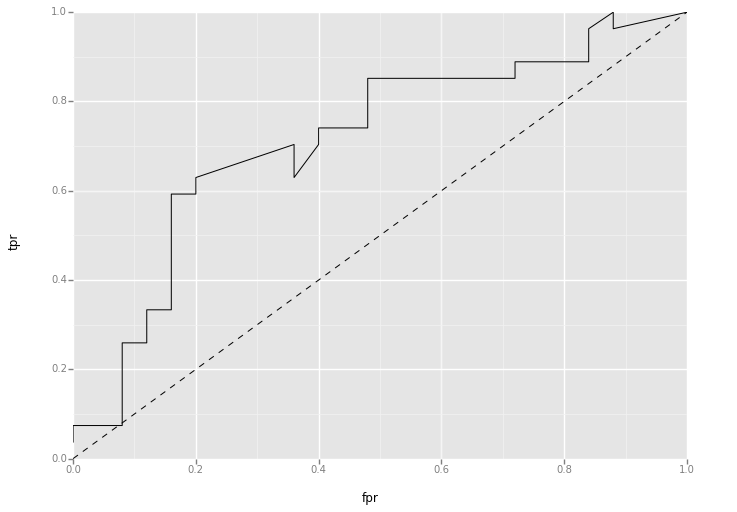

<ggplot: (-9223372036537091938)>

In [850]:
# ROC plot
preds = logreg.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, preds)
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr'))+geom_line()+geom_abline(linetype='dashed')

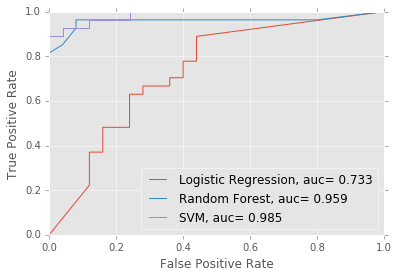

In [882]:
plt.figure(0).clf()

preds = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, preds)
auc = metrics.roc_auc_score(Y_test, preds)
df_lr = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
plt.plot(fpr,tpr,label="Logistic Regression, auc= %0.3f" %(auc))

preds = random_forest.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, preds)
auc = metrics.roc_auc_score(Y_test, preds)
df_rf = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
plt.plot(fpr,tpr,label="Random Forest, auc= %0.3f" %(auc))


preds = svc.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, preds)
auc = metrics.roc_auc_score(Y_test, preds)
df_svc = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
plt.plot(fpr,tpr,label="SVM, auc= %0.3f" %(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=0)

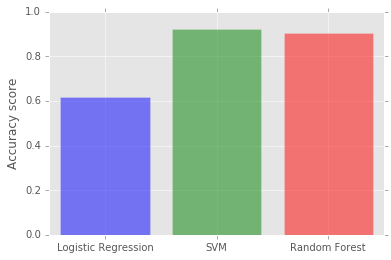

In [884]:
accuracy =  [logreg_accur, rf_accur, svc_accur]
objects = ('Logistic Regression', 'SVM', 'Random Forest' )
y_pos = np.arange(len(objects))
bar_width = 0.35
plt.bar(y_pos, accuracy, align='center', alpha=0.5, color=['b', 'g', 'r'] )
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy score') 
plt.show()

In [885]:
# accuracy function to collect accracy score from LR, SVM and RF
def accurcy(data):
    #prepared data for analysis
    data = data.drop("SampleNumber", axis=1)
    X = data.drop("Class", axis=1)
    Y = data["Class"]
    Y = pd.get_dummies(Y).aml
    # Split the dataset in two equal parts
    X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.6, random_state=0)
    
    #Logestic regression
    logreg = LogisticRegression()
    logreg.fit(X_train, Y_train)
    Y_pred_log = logreg.predict(X_test)
    logreg_accur=accuracy_score(Y_test, Y_pred_log)

    ##Support Vector Machines
    ## Scaling data for SVM
    X_train_scaled = preprocessing.scale(X_train)
    X_test_scaled = preprocessing.scale(X_test)
    svc = SVC(probability=True)
    svc.fit(X_train_scaled, Y_train)
    Y_pred_svc = svc.predict(X_test_scaled)
    svc_accur = accuracy_score(Y_test, Y_pred_svc)
    
    # Random Forests
    random_forest = RandomForestClassifier(n_estimators=15, random_state=0)
    #random_forest = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=10, max_features='sqrt', min_samples_split=5)
    random_forest.fit(X_train, Y_train)
    Y_pred_rf = random_forest.predict(X_test)
    random_forest.score(X_train, Y_train)
    rf_accur = accuracy_score(Y_test, Y_pred_rf)
    return [(logreg_accur, svc_accur, rf_accur)]

In [973]:
# method comparison with 5 random subsamplings 
methodcom = accurcy(data1) + accurcy(data2) + accurcy(data3) + accurcy(data4) + accurcy(data5)
methodcom = pd.DataFrame(temp1,  columns =  ["Logistic Regression", "SVM", "Random Forest"])

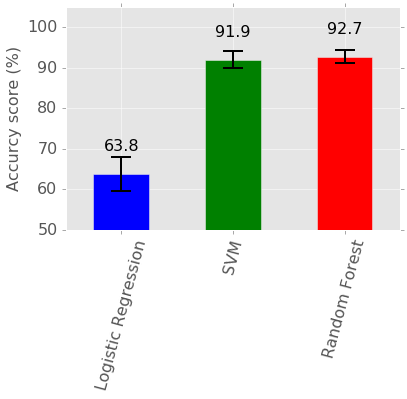

In [1013]:
means = methodcom.mean()*100
errors = methodcom.std()*100
ax = means.plot(yerr=errors,  kind='bar', color=['b', 'g', 'r'], rot=75, error_kw=dict(ecolor='black', lw=2, capsize=10, capthick=2))
ax.set_ylabel("Accurcy score (%)", fontsize=16)
ax.set_ylim(50,105)
#plt.axhline(y=91, color='g', linestyle='--')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

rects = ax.patches
# Now make some labels
labels = round(means,1)
for rect, label, error in zip(rects, labels, errors):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

Feature ranking:
1. feature 131 (0.098990)
2. feature 132 (0.094113)
3. feature 250 (0.066667)
4. feature 198 (0.059211)
5. feature 242 (0.059211)
6. feature 216 (0.059111)
7. feature 217 (0.059111)
8. feature 130 (0.059111)
9. feature 252 (0.058454)
10. feature 202 (0.052632)


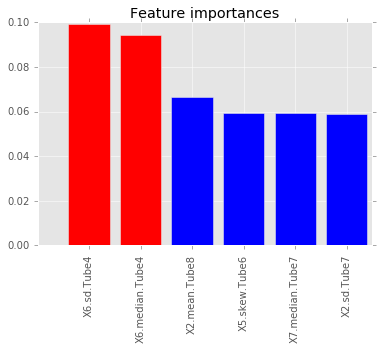

In [890]:
# Print Top10 feature ranking
print("Feature ranking:")
for f in range(10):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
xrange=range
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color=['r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', "b"], align="center")
plt.xticks(range(X_train.shape[1]), feature_labels[indices], rotation=90)
#plt.xticks(range(X_train.shape[1]), indices, rotation=90)
plt.xlim([-1, 5.5])
#plt.xlim([-1, 8.5])
plt.show()

In [896]:
xrange=range(5)
topimportances = importances[indices][:5]
topfeatures = feature_labels[indices][:5]  
topfeatures

Index(['X6.sd.Tube4', 'X6.median.Tube4', 'X2.mean.Tube8', 'X5.skew.Tube6',
       'X7.median.Tube7'],
      dtype='object')

In [941]:
topfeatures = ['CD16.SD', 'CD16.median', 'SSC.mean', 'CD45.skew',
       'CD10.median']

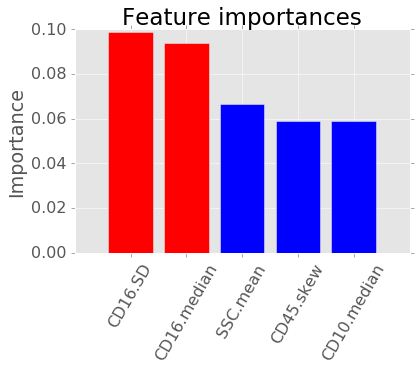

In [947]:
# Top 5 important features
matplotlib.rcParams.update({'font.size': 16})
plt.figure()
plt.title("Feature importances")
plt.bar(xrange, topimportances,
        color=['r', 'r', 'b', 'b', 'b'], align="center")
plt.xticks(xrange, topfeatures, rotation=60)
plt.ylabel('Importance') 
plt.show()

In [ ]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color=['r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', "b"], align="center")
plt.xticks(range(X_train.shape[1]), feature_labels[indices], rotation=90)
#plt.xticks(range(X_train.shape[1]), indices, rotation=90)
plt.xlim([-1, 5.5])
#plt.xlim([-1, 8.5])
plt.show()

In [833]:
X_train_testA = X_train_scaled[ :, 0:35]
X_train_testB = X_train_scaled[ :, 35:70]
X_train_testC = X_train_scaled[ :, 70:105]
X_train_testD = X_train_scaled[ :, 105:140]
X_train_testE = X_train_scaled[ :, 140:175]
X_train_testF = X_train_scaled[ :, 175:210]
X_train_testG = X_train_scaled[ :, 210:245]
X_train_testH = X_train_scaled[ :, 245:]

X_train_CD16 = X_train_scaled[ :, 131:135]
X_train_CD34 = X_train_scaled[ :, 200:205]

In [834]:
X_test_testA = X_test_scaled[ :, 0:35]
X_test_testB = X_test_scaled[ :, 35:70]
X_test_testC = X_test_scaled[ :, 70:105]
X_test_testD = X_test_scaled[ :, 105:140]
X_test_testE = X_test_scaled[ :, 140:175]
X_test_testF = X_test_scaled[ :, 175:210]
X_test_testG = X_test_scaled[ :, 210:245]
X_test_testH = X_test_scaled[ :, 245:]

X_test_CD16 = X_test_scaled[ :, 131:135]
X_test_CD34 = X_test_scaled[ :, 200:205]

In [835]:
# Random Forests with test D
random_forest_testD = RandomForestClassifier(n_estimators=15, random_state=0)
#random_forest = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=10, max_features='sqrt', min_samples_split=5)
random_forest.fit(X_train_testD, Y_train)
Y_pred_rf_testD = random_forest.predict(X_test_testD)
random_forest.score(X_train_testD, Y_train)
rf_accur_testD = accuracy_score(Y_test, Y_pred_rf_testD)
rf_accur_testD

0.94230769230769229

In [836]:
# Random Forests with CD16 features
random_forest_CD16 = RandomForestClassifier(n_estimators=15, random_state=0)
#random_forest = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=10, max_features='sqrt', min_samples_split=5)
random_forest.fit(X_train_CD16, Y_train)
Y_pred_rf_CD16 = random_forest.predict(X_test_CD16)
random_forest.score(X_train_CD16, Y_train)
rf_accur_CD16 = accuracy_score(Y_test, Y_pred_rf_CD16)
rf_accur_CD16

0.80769230769230771

In [837]:
# Random Forests with CD34 features
random_forest_CD34 = RandomForestClassifier(n_estimators=15, random_state=0)
#random_forest = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=10, max_features='sqrt', min_samples_split=5)
random_forest.fit(X_train_CD34, Y_train)
Y_pred_rf_CD34 = random_forest.predict(X_test_CD34)
random_forest.score(X_train_CD34, Y_train)
rf_accur_CD34 = accuracy_score(Y_test, Y_pred_rf_CD34)
rf_accur_CD34

0.82692307692307687

In [960]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred_rf_testD)

array([[23,  2],
       [ 1, 26]])

In [962]:
26/28

0.9285714285714286

In [503]:
#SVM with test A results
svc_testA = SVC(probability=True)
svc_testA.fit(X_train_testA, Y_train)
svc_testA.score(X_train_testA, Y_train)
Y_pred_svc_testA = svc_testA.predict(X_test_testA)
svc_testA.score(X_train_testA, Y_train)
svc_testA_accur = accuracy_score(Y_test, Y_pred_svc_testA)
svc_testA_accur

0.78846153846153844

In [504]:
#SVM with test B results
svc_testB = SVC(probability=True)
svc_testB.fit(X_train_testB, Y_train)
svc_testB.score(X_train_testB, Y_train)
Y_pred_svc_testB = svc_testB.predict(X_test_testB)
svc_testB.score(X_train_testB, Y_train)
svc_testB_accur = accuracy_score(Y_test, Y_pred_svc_testB)
svc_testB_accur

0.88461538461538458

In [505]:
#SVM with test C results
svc_testC = SVC(probability=True)
svc_testC.fit(X_train_testC, Y_train)
svc_testC.score(X_train_testC, Y_train)
Y_pred_svc_testC = svc_testC.predict(X_test_testC)
svc_testC.score(X_train_testC, Y_train)
svc_testC_accur = accuracy_score(Y_test, Y_pred_svc_testC)
svc_testC_accur

0.86538461538461542

In [506]:
#SVM with test D results
svc_testD = SVC( probability=True)
svc_testD.fit(X_train_testD, Y_train)
svc_testD.score(X_train_testD, Y_train)
Y_pred_svc_testD = svc_testD.predict(X_test_testD)
svc_testD.score(X_train_testD, Y_train)
svc_testD_accur = accuracy_score(Y_test, Y_pred_svc_testD)
svc_testD_accur

0.94230769230769229

In [507]:
#SVM with test E results
svc_testE = SVC( probability=True)
svc_testE.fit(X_train_testE, Y_train)
svc_testE.score(X_train_testE, Y_train)
Y_pred_svc_testE = svc_testE.predict(X_test_testE)
svc_testE.score(X_train_testE, Y_train)
svc_testE_accur = accuracy_score(Y_test, Y_pred_svc_testE)
svc_testE_accur

0.90384615384615385

In [508]:
#SVM with test F results
svc_testF = SVC( probability=True)
svc_testF.fit(X_train_testF, Y_train)
svc_testF.score(X_train_testF, Y_train)
Y_pred_svc_testF = svc_testF.predict(X_test_testF)
svc_testF.score(X_train_testF, Y_train)
svc_testF_accur = accuracy_score(Y_test, Y_pred_svc_testF)
svc_testF_accur

0.88461538461538458

In [509]:
#SVM with test G results
svc_testG = SVC(probability=True)
svc_testG.fit(X_train_testG, Y_train)
svc_testG.score(X_train_testG, Y_train)
Y_pred_svc_testG = svc_testG.predict(X_test_testG)
svc_testG.score(X_train_testG, Y_train)
svc_testG_accur = accuracy_score(Y_test, Y_pred_svc_testG)
svc_testG_accur

0.82692307692307687

In [510]:
#SVM with test H results
svc_testH = SVC(probability=True)
svc_testH.fit(X_train_testH, Y_train)
svc_testH.score(X_train_testH, Y_train)
Y_pred_svc_testH = svc_testH.predict(X_test_testH)
svc_testH.score(X_train_testH, Y_train)
svc_testH_accur = accuracy_score(Y_test, Y_pred_svc_testH)
svc_testH_accur

0.88461538461538458

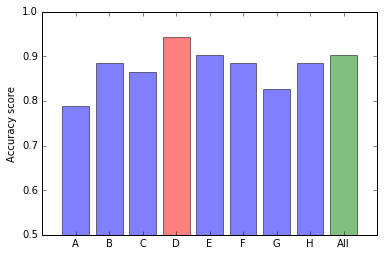

In [520]:
accuracy = [svc_testA_accur, svc_testB_accur, svc_testC_accur, svc_testD_accur, svc_testE_accur, svc_testF_accur, svc_testG_accur, svc_testH_accur, svc_accur]
objects = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'All')
y_pos = np.arange(len(objects))
plt.bar(y_pos, accuracy, align='center', alpha=0.5, color=['b', 'b', 'b', 'r', 'b', 'b', 'b', 'b', "g"])
plt.ylim(0.5, 1)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy score') 
plt.show()

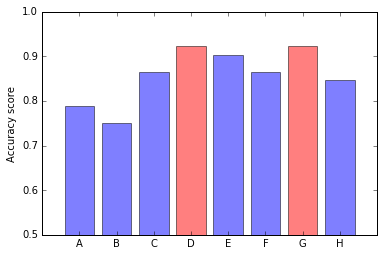

In [496]:
accuracy = [svc_testA_accur, svc_testB_accur, svc_testC_accur, svc_testD_accur, svc_testE_accur, svc_testF_accur, svc_testG_accur, svc_testH_accur]
objects = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H')
y_pos = np.arange(len(objects))
plt.bar(y_pos, accuracy, align='center', alpha=0.5, color=['b', 'b', 'b', 'r', 'b', 'b', 'r', 'b'])
plt.ylim(0.5, 1)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy score') 
plt.show()

In [489]:
#Random forest with test F results
rf_testF = RandomForestClassifier(n_estimators=15, random_state=0)
rf_testF.fit(X_train_testF, Y_train)
rf_testF.score(X_train_testF, Y_train)
Y_pred_rf_testF = rf_testF.predict(X_test_testF)
rf_testF.score(X_train_testF, Y_train)
rf_testF_accur = accuracy_score(Y_test, Y_pred_rf_testF)
rf_testF_accur

0.86538461538461542

In [1063]:
alldata = pd.read_table("alldataprep2.txt", delim_whitespace=True)

In [1064]:
alldata.head()

,SampleNumber,1.mean.Tube1,1.sd.Tube1,1.median.Tube1,1.skew.Tube1,1.kurtosis.Tube1,2.mean.Tube1,2.sd.Tube1,2.median.Tube1,2.skew.Tube1,...,6.sd.Tube8,6.median.Tube8,6.skew.Tube8,6.kurtosis.Tube8,7.mean.Tube8,7.sd.Tube8,7.median.Tube8,7.skew.Tube8,7.kurtosis.Tube8,Label
1,1,0.684433,0.228759,0.731183,-0.316618,-1.051457,0.016795,0.015372,0.017525,7.254818,...,0.008169,0.000065,66.973703,6065.577568,0.000131,0.001333,0.000050,65.976405,5921.640291,normal
9,2,0.568986,0.251365,0.619746,-0.017270,-1.403105,0.012331,0.008796,0.013117,3.057543,...,0.005437,0.000091,122.702870,18561.321245,0.000113,0.001792,0.000061,156.042670,25985.223644,normal
17,3,0.603779,0.199342,0.627566,-0.279158,-0.420299,0.018042,0.022776,0.017685,31.494076,...,0.008838,0.000119,39.205049,3491.098043,0.000254,0.001276,0.000070,45.931576,4475.234542,normal
25,4,0.608508,0.222787,0.657869,-0.411906,-0.784437,0.018271,0.015740,0.018671,16.850874,...,0.013172,0.000081,45.271939,2662.372124,0.000215,0.002639,0.000068,50.453911,3172.847701,normal
33,5,0.692233,0.209628,0.701857,-0.133803,-1.049806,0.009618,0.008040,0.007745,4.444330,...,0.008160,0.000303,59.806390,4185.948525,0.000194,0.009318,0.000067,99.539370,9934.636757,aml


In [1065]:
alldata = alldata.drop("SampleNumber", axis=1)
X = alldata.drop("Label", axis=1)
Y = alldata["Label"]
Y = pd.get_dummies(Y).aml

In [1051]:
# Split the dataset in two equal parts
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.6, random_state=1)

In [1052]:
# Random Forests
random_forest = RandomForestClassifier(n_estimators=15, random_state=0)
#random_forest = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=10, max_features='sqrt', min_samples_split=5)
random_forest.fit(X_train, Y_train)
Y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
rf_accur = accuracy_score(Y_test, Y_pred_rf)
rf_accur

0.95833333333333337

In [1053]:
# Random Forests with weight using all data
random_forest = RandomForestClassifier(n_estimators=100, random_state=0, class_weight="balanced")
#random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest.fit(X_train, Y_train)
Y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
rf_accur = accuracy_score(Y_test, Y_pred_rf)
rf_accur

0.95833333333333337

In [1054]:
confusion_matrix(Y_test, Y_pred_rf)

array([[191,   1],
       [  8,  16]])

from sklearn.model_selection import cross_val_score
random_forest = RandomForestClassifier(n_estimators=15, random_state=0, class_weight="balanced")
scores = cross_val_score(random_forest, X_train, Y_train, cv=5)
scores 

In [1059]:
from sklearn.cross_validation import cross_val_score
random_forest = RandomForestClassifier(n_estimators=15, random_state=0, class_weight="balanced")
scores = cross_val_score(random_forest, X, Y, cv=5)
scores 

array([ 0.95890411,  0.94444444,  0.97222222,  1.        ,  0.97183099])

In [1060]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.969480352434
